In [1]:
import os
# Find the latest version of spark 3.2 from http://www.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.2.3'
spark_version = 'spark-3.2.3'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 261 kB in 3s (102 kB/s)
Reading package lis

In [2]:
# Download the Postgres driver that will allow Spark to interact with Postgres.
!wget https://jdbc.postgresql.org/download/postgresql-42.2.16.jar

--2023-01-07 04:27:21--  https://jdbc.postgresql.org/download/postgresql-42.2.16.jar
Resolving jdbc.postgresql.org (jdbc.postgresql.org)... 72.32.157.228, 2001:4800:3e1:1::228
Connecting to jdbc.postgresql.org (jdbc.postgresql.org)|72.32.157.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1002883 (979K) [application/java-archive]
Saving to: ‘postgresql-42.2.16.jar.1’

postgresql-42.2.16. 100%[===================>] 979.38K  --.-KB/s    in 0.09s   

2023-01-07 04:27:21 (11.0 MB/s) - ‘postgresql-42.2.16.jar.1’ saved [1002883/1002883]



In [3]:
# Start spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("ETL_final_project").config("spark.driver.extraClassPath","/content/postgresql-42.2.16.jar").getOrCreate()

In [4]:
# import libraries for Exploratory Data Analysis
import pandas as pd
from pyspark import SparkFiles
import numpy as no
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sn

In [5]:
# Drive helper
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# path ="/content/drive/MyDrive/data/Daily_County-Level_Ozone_Concentrations__2001-2016.csv"
# spark.sparkContext.addFile(path)
# df = spark.read.option("encoding", "UTF-8").csv(SparkFiles.get(""), sep=",", header=True, inferSchema=True)
# df.show()

In [6]:
path ="/content/drive/MyDrive/data/Daily_County-Level_Ozone_Concentrations__2001-2016.csv"
ozone_df= pd.read_csv(path)
ozone_df.tail()


,Year,Month,Day,statefips,countyfips,O3_max_pred,O3_med_pred,O3_mean_pred,O3_pop_pred
18168991,2016,DEC,31,56,37,41.8023,40.98200,40.954517,41.030787
18168992,2016,DEC,31,56,39,39.8256,39.24925,39.252300,39.160351
18168993,2016,DEC,31,56,41,42.7244,39.59090,40.449267,40.374935
18168994,2016,DEC,31,56,43,35.3622,33.30220,33.924567,34.047683
18168995,2016,DEC,31,56,45,39.6921,38.58465,38.584650,38.673762


In [7]:
path2="/content/drive/MyDrive/data/cancer_incidence.csv"
df_cancer=pd.read_csv(path2)
pd.set_option('display.max_columns', None)
df_cancer.head()

,index,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,0,"US (SEER+NPCR)(1,10)",0,62.4,62.3,62.6,214614,falling,-2.5,-3,-2
1,1,"Autauga County, Alabama(6,10)",1001,74.9,65.1,85.7,43,stable,0.5,-14.9,18.6
2,2,"Baldwin County, Alabama(6,10)",1003,66.9,62.4,71.7,170,stable,3,-10.2,18.3
3,3,"Barbour County, Alabama(6,10)",1005,74.6,61.8,89.4,25,stable,-6.4,-18.3,7.3
4,4,"Bibb County, Alabama(6,10)",1007,86.4,71,104.2,23,stable,-4.5,-31.4,32.9


In [8]:
#get numbber of rows and columns
ozone_df.shape

(18168996, 9)

In [9]:
df_cancer.shape

(3141, 11)

In [10]:
df_cancer.dtypes

index                                                  int64
County                                                object
 FIPS                                                  int64
Age-Adjusted Incidence Rate(Ê) - cases per 100,000    object
Lower 95% Confidence Interval                         object
Upper 95% Confidence Interval                         object
Average Annual Count                                  object
Recent Trend                                          object
Recent 5-Year Trend (ˆ) in Incidence Rates            object
Lower 95% Confidence Interval.1                       object
Upper 95% Confidence Interval.1                       object
dtype: object

In [11]:
df_cancer['Recent Trend'].value_counts()

stable     2429
*           260
falling     200
_           192
rising       43
__           17
Name: Recent Trend, dtype: int64

In [12]:
df_cancer.isnull().sum().values.any()

False

In [13]:
# has special characters
print(df_cancer[df_cancer['Recent Trend'].str.contains(r'[*_―—-]')])

      index                                    County   FIPS  \
68       68      Aleutians East Borough, Alaska(6,10)   2013   
69       69  Aleutians West Census Area, Alaska(6,10)   2016   
72       72         Bristol Bay Borough, Alaska(6,10)   2060   
73       73                      Denali, Alaska(6,10)   2068   
74       74      Dillingham Census Area, Alaska(6,10)   2070   
...     ...                                       ...    ...   
2930   2930            Lexington City, Virginia(6,10)  51678   
2933   2933        Manassas Park City, Virginia(6,10)  51685   
2963   2963         Garfield County, Washington(6,10)  53023   
3131   3131            Niobrara County, Wyoming(6,10)  56027   
3135   3135            Sublette County, Wyoming(6,10)  56035   

     Age-Adjusted Incidence Rate(Ê) - cases per 100,000  \
68                                                   *    
69                                                   *    
72                                                   *

In [14]:
# drop rows with special characters
df_cancer=df_cancer.drop(df_cancer[df_cancer['Recent Trend'].str.contains(r'[*_―—-]')].index)

In [15]:
df_cancer['Recent Trend'].value_counts()

stable     2429
falling     200
rising       43
Name: Recent Trend, dtype: int64

In [16]:
ozone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18168996 entries, 0 to 18168995
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Year          int64  
 1   Month         object 
 2   Day           int64  
 3   statefips     int64  
 4   countyfips    int64  
 5   O3_max_pred   float64
 6   O3_med_pred   float64
 7   O3_mean_pred  float64
 8   O3_pop_pred   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 1.2+ GB


In [17]:
ozone_df.isnull().values.any()

False

In [18]:
ozone_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,18168996.0,2008.501027,4.609846,2001.000000,2004.750000,2008.50000,2012.250000,2016.000000
Day,18168996.0,15.729637,8.800092,1.000000,8.000000,16.00000,23.000000,31.000000
statefips,18168996.0,30.575105,14.964198,1.000000,19.000000,29.00000,46.000000,56.000000
countyfips,18168996.0,103.437440,108.064243,1.000000,35.000000,79.00000,133.000000,840.000000
O3_max_pred,18168996.0,41.212981,12.202074,0.940476,32.424334,40.03070,48.877900,147.443510
O3_med_pred,18168996.0,40.080713,12.034281,0.524195,31.446659,39.04875,47.827332,137.066281
O3_mean_pred,18168996.0,40.098398,12.006874,0.755492,31.474275,39.06665,47.834200,136.500010
O3_pop_pred,18168996.0,40.094743,12.011415,0.676899,31.466675,39.06188,47.832787,135.343729


In [19]:
# Remove years after 2014
ozone_df= ozone_df[ozone_df['Year']<=2014]


In [20]:
ozone_df=ozone_df.astype({'statefips':'string', 'countyfips':'string'})


In [21]:
# Create FIPS joining countyfips and statefips
ozone_df ['FIPS']= ozone_df['statefips'].astype(str) + ozone_df['countyfips']
# Convert FIPS back to int
ozone_df=ozone_df.astype({'FIPS':'int'})
ozone_df.head()

,Year,Month,Day,statefips,countyfips,O3_max_pred,O3_med_pred,O3_mean_pred,O3_pop_pred,FIPS
0,2001,JAN,1,1,1,31.939058,31.691988,31.680859,31.671226,11
1,2001,JAN,1,1,3,33.646855,33.170271,32.994775,32.935070,13
2,2001,JAN,1,1,5,34.288917,34.068507,34.077954,34.086631,15
3,2001,JAN,1,1,7,30.349767,30.036093,29.931756,29.991733,17
4,2001,JAN,1,1,9,26.472655,25.776595,25.857571,25.872472,19


In [22]:
df = pd.merge(df_cancer, ozone_df, how='inner', left_on=' FIPS', right_on='FIPS')
df.head()

,index,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,Year,Month,Day,statefips,countyfips,O3_max_pred,O3_med_pred,O3_mean_pred,O3_pop_pred,FIPS
0,51,"Montgomery County, Alabama(6,10)",1101,61,56.5,65.6,144,falling,-9.6,-15.1,-3.8,2001,JAN,1,1,101,32.752448,31.678819,31.727547,31.716443,1101
1,51,"Montgomery County, Alabama(6,10)",1101,61,56.5,65.6,144,falling,-9.6,-15.1,-3.8,2001,JAN,2,1,101,24.798050,23.420179,23.552070,23.518795,1101
2,51,"Montgomery County, Alabama(6,10)",1101,61,56.5,65.6,144,falling,-9.6,-15.1,-3.8,2001,JAN,3,1,101,32.101181,30.061369,30.149585,30.088467,1101
3,51,"Montgomery County, Alabama(6,10)",1101,61,56.5,65.6,144,falling,-9.6,-15.1,-3.8,2001,JAN,4,1,101,32.713726,29.009812,29.165302,29.057594,1101
4,51,"Montgomery County, Alabama(6,10)",1101,61,56.5,65.6,144,falling,-9.6,-15.1,-3.8,2001,JAN,5,1,101,35.813905,31.581527,31.777314,31.689946,1101


In [23]:
len(df)

5455571

In [24]:
#aggreagate ozone data by county
df_agg =df.groupby('FIPS').agg({'O3_max_pred':'mean','O3_med_pred':'mean','O3_mean_pred':'mean'})
df_agg.reset_index(inplace=True)
df_agg

,FIPS,O3_max_pred,O3_med_pred,O3_mean_pred
0,1101,41.874165,39.939759,39.977164
1,1103,43.308170,41.901690,41.888594
2,1105,39.805057,38.986625,39.022229
3,1107,39.979953,39.173487,39.137133
4,1109,40.690546,39.856677,39.866958
...,...,...,...,...
1043,55133,38.945330,36.419724,36.515294
1044,55135,39.086669,38.129168,38.118226
1045,55137,39.383301,38.640274,38.622163
1046,55139,39.368464,38.237115,38.154423


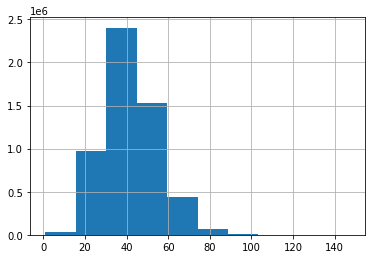

In [25]:

df.O3_max_pred.hist()

In [26]:
pd.options.display.float_format = '{:20,.2f}'.format

df.O3_max_pred.describe()

count           5,455,571.00
mean                   41.75
std                    12.82
min                     0.94
25%                    32.43
50%                    40.39
75%                    49.96
max                   147.27
Name: O3_max_pred, dtype: float64

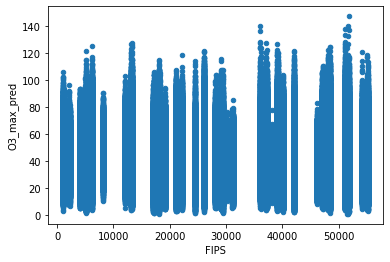

In [30]:
df.plot(x='FIPS', y='O3_max_pred', kind='scatter')

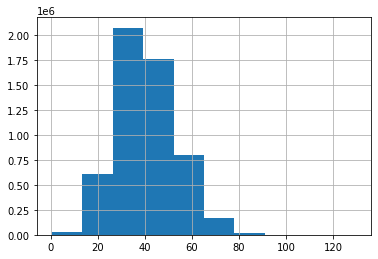

In [33]:
df.O3_med_pred.hist()

In [27]:

df.O3_med_pred.describe()

count           5,455,571.00
mean                   40.69
std                    12.62
min                     0.52
25%                    31.55
50%                    39.47
75%                    48.93
max                   129.87
Name: O3_med_pred, dtype: float64

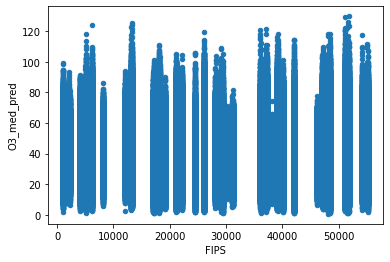

In [31]:
df.plot(x='FIPS', y='O3_med_pred', kind='scatter')

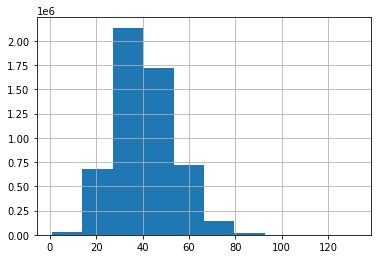

In [34]:
df.O3_mean_pred.hist()

In [28]:
df.O3_mean_pred.describe()

count           5,455,571.00
mean                   40.71
std                    12.60
min                     0.87
25%                    31.57
50%                    39.49
75%                    48.93
max                   132.06
Name: O3_mean_pred, dtype: float64

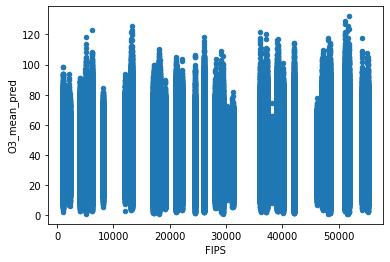

In [32]:
df.plot(x='FIPS', y='O3_mean_pred', kind='scatter')

In [42]:

# investigate high Ozone FIPS

hi_df = df[(df['FIPS']>50000)]
hi_df.head()

,index,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,Year,Month,Day,statefips,countyfips,O3_max_pred,O3_med_pred,O3_mean_pred,O3_pop_pred,FIPS
4903367,2867,"King William County, Virginia(6,10)",51101,60.8,45.4,79.9,11,stable,5,-35,69.7,2001,JAN,1,51,101,30.26,30.22,30.15,30.15,51101
4903368,2867,"King William County, Virginia(6,10)",51101,60.8,45.4,79.9,11,stable,5,-35,69.7,2001,JAN,2,51,101,32.60,32.43,32.41,32.41,51101
4903369,2867,"King William County, Virginia(6,10)",51101,60.8,45.4,79.9,11,stable,5,-35,69.7,2001,JAN,3,51,101,32.13,31.80,31.75,31.77,51101
4903370,2867,"King William County, Virginia(6,10)",51101,60.8,45.4,79.9,11,stable,5,-35,69.7,2001,JAN,4,51,101,26.20,25.53,25.56,25.41,51101
4903371,2867,"King William County, Virginia(6,10)",51101,60.8,45.4,79.9,11,stable,5,-35,69.7,2001,JAN,5,51,101,19.03,17.12,17.24,16.88,51101


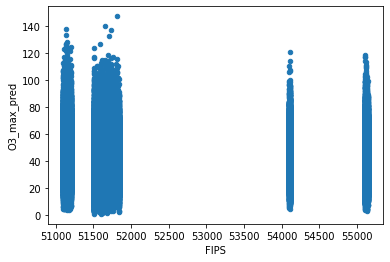

In [43]:
hi_df.plot(x='FIPS', y='O3_max_pred', kind='scatter')

In [47]:
hi_df.sort_values('O3_max_pred', ascending=False)


,index,County,FIPS,"Age-Adjusted Incidence Rate(Ê) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,Average Annual Count,Recent Trend,Recent 5-Year Trend (ˆ) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,Year,Month,Day,statefips,countyfips,O3_max_pred,O3_med_pred,O3_mean_pred,O3_pop_pred,FIPS
5303087,2947,"Virginia Beach City, Virginia(6,10)",51810,67.5,64,71.2,279,stable,5.4,-7.3,19.8,2003,JUN,26,51,810,147.27,123.20,123.92,123.14,51810
5211053,2927,"Hampton City, Virginia(6,10)",51650,76.8,70.4,83.6,110,stable,-2.7,-10.3,5.4,2003,JUN,26,51,650,140.31,124.31,123.93,123.97,51650
4970742,2880,"Northampton County, Virginia(6,10)",51131,83.6,65.9,105.5,17,stable,-5.4,-21.5,13.9,2003,JUN,26,51,131,137.66,122.00,127.06,127.13,51131
5262183,2939,"Poquoson City, Virginia(6,10)",51735,50.2,34.9,70.4,7,stable,17.3,-39.1,126,2003,JUN,26,51,735,136.95,129.87,132.06,131.56,51735
4970055,2880,"Northampton County, Virginia(6,10)",51131,83.6,65.9,105.5,17,stable,-5.4,-21.5,13.9,2001,AUG,8,51,131,133.16,129.40,128.96,128.76,51131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194452,2923,"Falls Church City, Virginia(6,10)",51610,44.8,28.2,67.2,5,stable,-7.2,-21.2,9.3,2014,JAN,10,51,610,1.86,1.78,1.80,1.81,51610
5191133,2923,"Falls Church City, Virginia(6,10)",51610,44.8,28.2,67.2,5,stable,-7.2,-21.2,9.3,2004,DEC,9,51,610,1.48,1.47,1.44,1.43,51610
5194799,2923,"Falls Church City, Virginia(6,10)",51610,44.8,28.2,67.2,5,stable,-7.2,-21.2,9.3,2014,DEC,23,51,610,1.45,1.43,1.40,1.41,51610
5143669,2913,"Alexandria City, Virginia(6,10)",51510,28.8,24.4,33.8,34,stable,-9.2,-24.8,9.6,2014,DEC,23,51,510,1.18,1.09,1.09,1.10,51510
